In [21]:
## Import pandas library and a csv file

import pandas as pd
df = pd.read_csv('F:\\DataScience\\Datasets\\multi_city_weather.csv')

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
len(df)

366

In [57]:
### Summary statistics is obtained using following command

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [58]:
### Max and min temprature recorded

df['MaxTemp'].max(), df['MinTemp'].min()

(35.8, -5.3)

In [59]:
### Max and min tempratures for a particular city

df[df['City'] == 'NY']['MaxTemp'].max(), df[df['City'] == 'NY']['MinTemp'].min()

(30.7, -5.3)

In [60]:
### Maximum and minimum temprature in each city

df.groupby(['City'])['MaxTemp'].max(), df.groupby(['City'])['MinTemp'].min()

(City
 BO    35.2
 LA    35.8
 NY    30.7
 Name: MaxTemp, dtype: float64, City
 BO   -2.7
 LA    6.1
 NY   -5.3
 Name: MinTemp, dtype: float64)

(<matplotlib.axes._subplots.AxesSubplot at 0xdbdd510>,
 <matplotlib.axes._subplots.AxesSubplot at 0xdbdd510>)

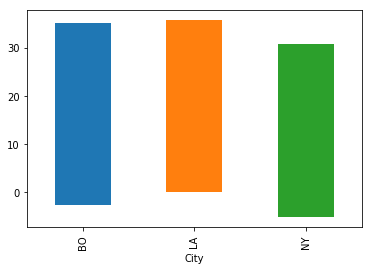

In [61]:
### Plot of maximum and minimum temprature

df.groupby(['City'])['MaxTemp'].max().plot(kind = 'bar'), df.groupby(['City'])['MinTemp'].min().plot(kind = 'bar')

In [62]:
### Average maximum and minimum tempratures by city

df.groupby(['City'])['MaxTemp', 'MinTemp'].mean()

,MaxTemp,MinTemp
City,,
BO,21.622321,7.404464
LA,26.387879,13.658586
NY,16.047097,3.081935


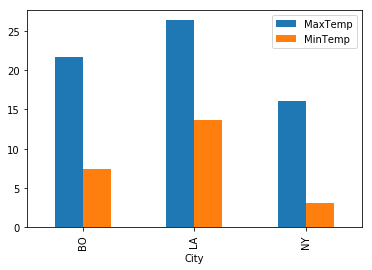

In [65]:
### Graph of average tempratures

df.groupby(['City'])['MaxTemp', 'MinTemp'].mean().plot(kind = 'bar')

In [85]:
### No. of recorded observations for each city

df_c = df['City'].value_counts().sort_index()
df_c

BO    112
LA     99
NY    155
Name: City, dtype: int64

In [86]:
### No. of days when it rained

df_r = df[df['RainToday'] == 'Yes']['City'].value_counts().sort_index()
df_r

BO    16
LA    27
NY    23
Name: City, dtype: int64

In [92]:
### % of rainy days

df_pc = (df_r / df_c) * 100
df_pc.columns = ['City', '%Rain']
df_pc

BO    14.285714
LA    27.272727
NY    14.838710
Name: City, dtype: float64

In [8]:
df['Sunshine'].mean()

7.909366391184575

In [22]:
df.fillna(0, inplace=True)
df['Sunshine'].mean()

7.844535519125685

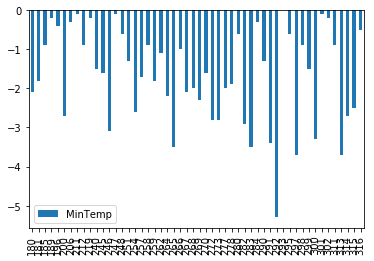

In [26]:
df[['City','MinTemp']][df['MinTemp']<=0.0].plot(kind = 'bar')

In [23]:
df.shape

(366, 23)

In [11]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


In [8]:
df['MaxTemp'].corr(df['Sunshine'])

0.45206351617824436